In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [5]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [6]:
df=pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [8]:
df["total_bedrooms"].fillna(df["total_bedrooms"].mode()[0], inplace=True)

<ipython-input-8-90eb0f031fdf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(df["total_bedrooms"].mode()[0], inplace=True)


In [9]:
df["total_bedrooms"].isnull().sum()

0

In [10]:
df.drop("ocean_proximity", axis=1, inplace=True)

In [11]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

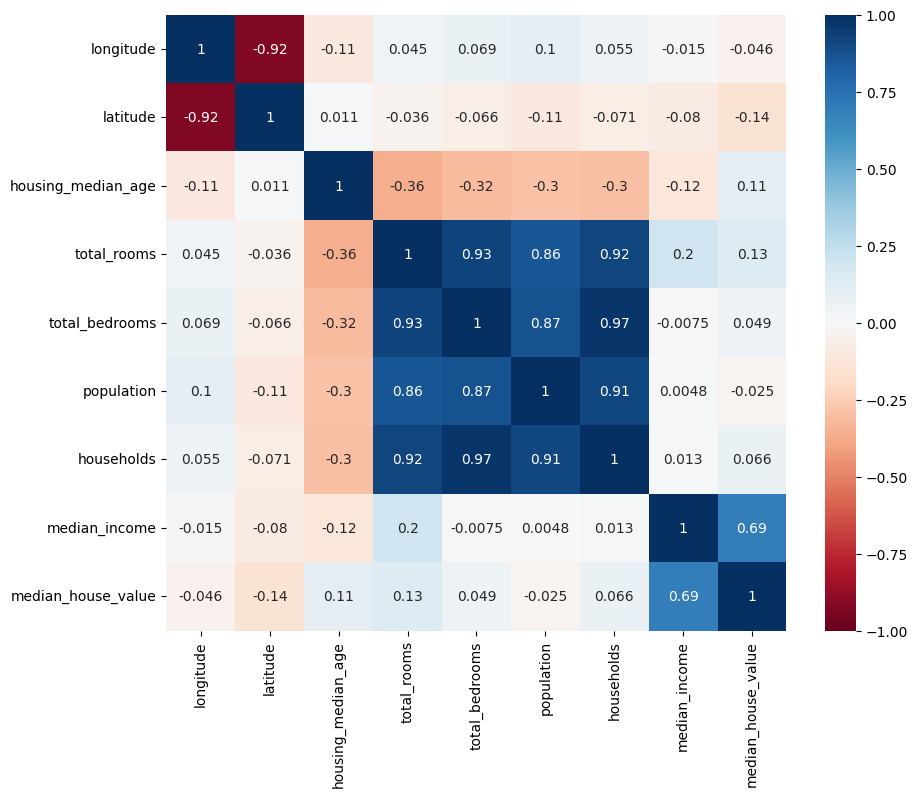

In [12]:
import seaborn as sns
corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()

Removing the perfectly or strongly correleated columns to prevent overfitting by regression models

In [13]:
df.drop(["total_bedrooms", "population", "median_house_value"], axis=1, inplace=True)

In [14]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,households,median_income
0,-122.23,37.88,41.0,880.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,177.0,7.2574


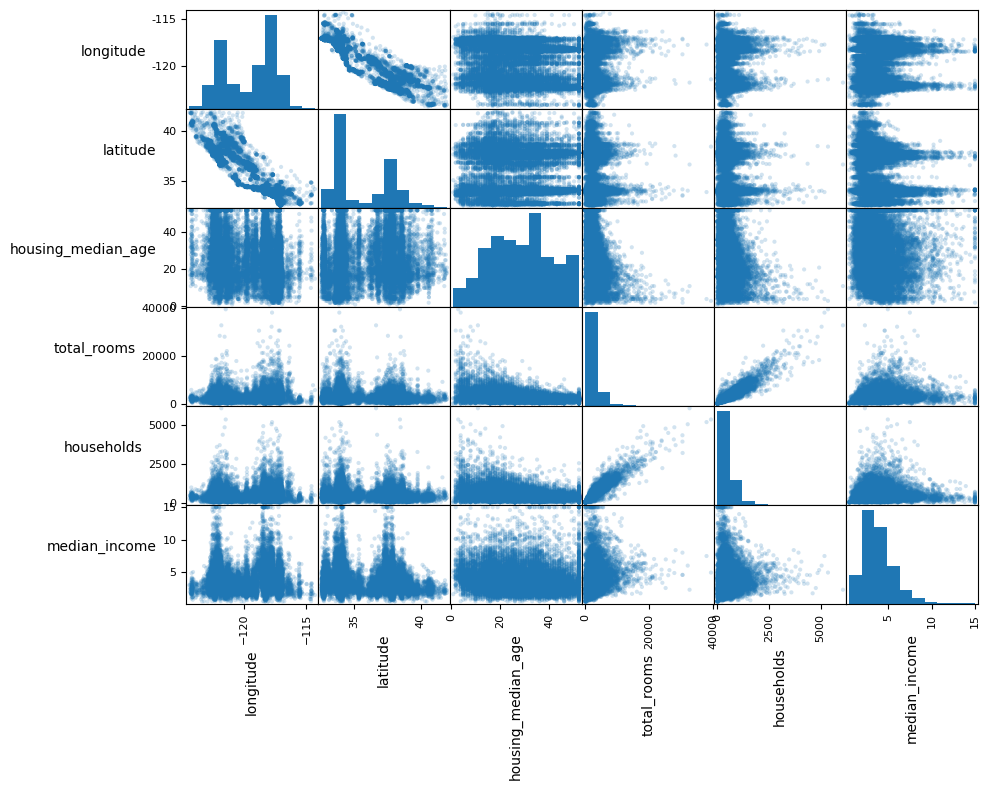

In [15]:
from pandas.plotting import scatter_matrix

# Select only numerical columns
num_df = df.select_dtypes(include=['number'])

# Create the scatter matrix
axes = scatter_matrix(num_df, alpha=0.2, figsize=(10, 8))

# Rotate axis labels for readability
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)  # Rotate x-axis labels
    ax.yaxis.label.set_rotation(0)   # Keep y-axis labels horizontal
    ax.yaxis.label.set_ha('right')   # Align y-axis labels to the right

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)  # Reduce white space between subplots

plt.show()


**Simple Linear Regression Model**

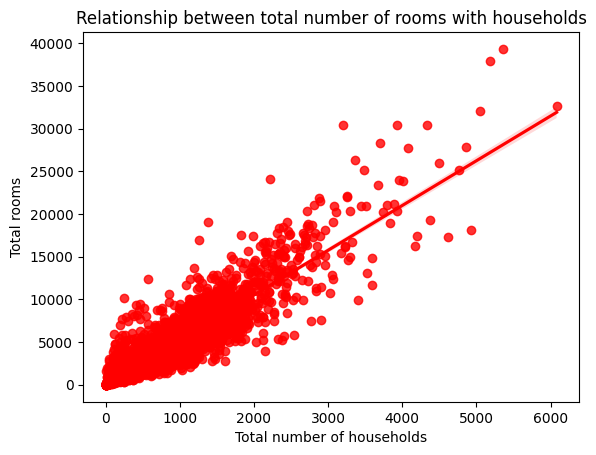

In [16]:
#We have seen that total number of households has quite a linear relationship with total rooms.
sns.regplot(x="households", y="total_rooms", data=df, color="red")
plt.xlabel("Total number of households")
plt.ylabel("Total rooms")
plt.title("Relationship between total number of rooms with households")
plt.show()

This is informative as lesser households in a block require lesser rooms. The number of rooms are increasing as number of households in a block are also increasing

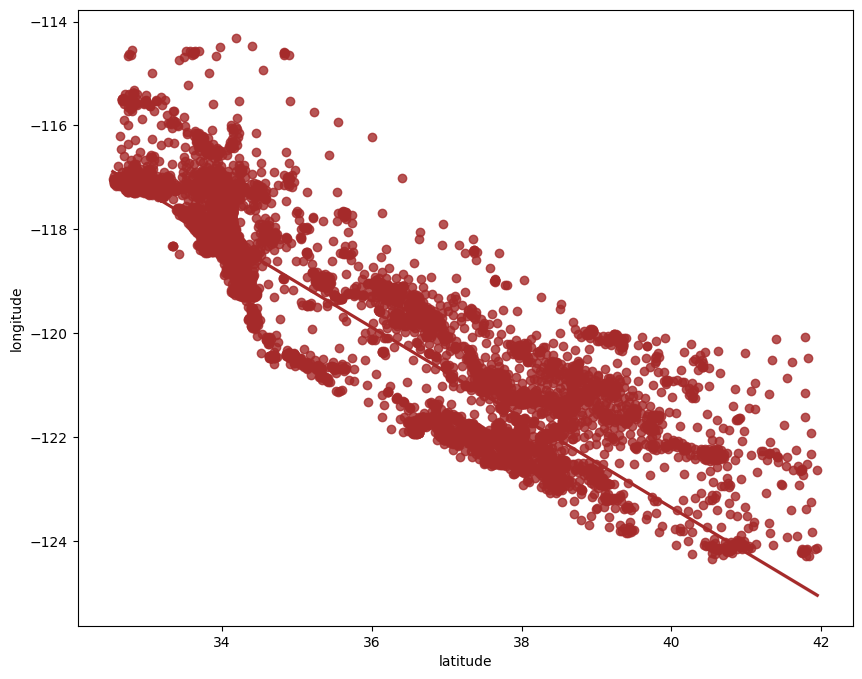

In [17]:
plt.figure(figsize=(10,8))
sns.regplot(x="latitude", y="longitude", data=df, color="brown")
plt.show()

This shows strong negative correlation.

**Building a simple Linear Regression Model**

In [18]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,households,median_income
0,-122.23,37.88,41.0,880.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,177.0,7.2574


In [19]:
y_data=df["median_income"]

In [20]:
x_data=df.drop("median_income", axis=1)
x_data


,longitude,latitude,housing_median_age,total_rooms,households
0,-122.23,37.88,41.0,880.0,126.0
1,-122.22,37.86,21.0,7099.0,1138.0
2,-122.24,37.85,52.0,1467.0,177.0
3,-122.25,37.85,52.0,1274.0,219.0
4,-122.25,37.85,52.0,1627.0,259.0
...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,330.0
20636,-121.21,39.49,18.0,697.0,114.0
20637,-121.22,39.43,17.0,2254.0,433.0
20638,-121.32,39.43,18.0,1860.0,349.0


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, random_state=42)
print("No.of test samples", x_test.shape[0])
print("No.of train samples", x_train.shape[0])

No.of test samples 4128
No.of train samples 16512


In [22]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr

LinearRegression()

We fit the model on train data and calculated the rsquare

In [23]:
lr.fit(x_train[["households"]], y_train)
lr.score(x_train[["households"]], y_train)

0.00016322761045373113

In [24]:
lr.fit(x_test[["households"]], y_test)
lr.score(x_test[["households"]], y_test)

0.00019432929315388314

We can see that R-square is smaller using the train data as compared to the test data. The model is underfitting and too simple to fit the data

**Cross Validation Method**

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
Rcross=cross_val_score(lr, x_data[["households"]], y_data, cv=4)
Rcross

array([-0.09842523, -0.01356804, -0.00464459, -0.01791806])

A negative Rsquare means the model has very poor predictive power and we need to increase the variables

We can use the cross validation to predict the result

In [27]:
from sklearn.model_selection import cross_val_predict

In [28]:
y_hat=cross_val_predict(lr,x_data[["households"]], y_data, cv=4)
y_hat[0:5]

array([4.02672148, 3.99166816, 4.02495495, 4.02350017, 4.02211467])

**Multiple Linear Regression Model**

In [29]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,households,median_income
0,-122.23,37.88,41.0,880.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,177.0,7.2574


In [30]:
y_data1=df["median_income"]
x_data1=df[["housing_median_age","total_rooms", "households"]]

In [31]:
x_train1, x_test1, y_train1, y_test1=train_test_split(x_data1, y_data1, test_size=0.2, random_state=0)
print("No.of training samples", x_train1.shape[0])
print("No.of test samples", x_test1.shape[0])

No.of training samples 16512
No.of test samples 4128


In [32]:
lr1=LinearRegression()
lr1

LinearRegression()

In [33]:
#Prediction using trained data
from sklearn.metrics import mean_squared_error
lr1.fit(x_train1, y_train1)
y_hat_train=lr1.predict(x_train1)
#Finding the R-square and MSE values of the trained data
train_r2=lr1.score(x_train1, y_train1)
print("The value of R-squared for training data is", train_r2)
mse_train=mean_squared_error(y_train1, y_hat_train)
print("The value of MSE for training data is", mse_train)

The value of R-squared for training data is 0.22096871449084754
The value of MSE for training data is 2.8322483376101455


In [34]:
#Prediction using test data
lr2=LinearRegression()
lr2.fit(x_test1, y_test1)
y_hat_test=lr2.predict(x_test1)
test_r2=lr2.score(x_test1, y_test1)
print("The value of R squared for testing data is", test_r2)
mse_test=mean_squared_error(y_test1, y_hat_test)
print("The value of MSE for test data is", mse_test)

The value of R squared for testing data is 0.2258803517185929
The value of MSE for test data is 2.71150411903623


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


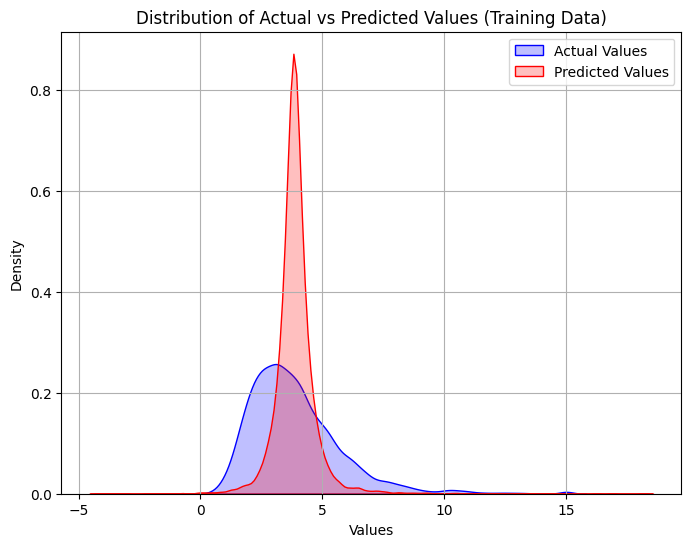

In [36]:
plt.figure(figsize=(8, 6))

sns.kdeplot(y_train1, label="Actual Values", color="blue", fill=True)
sns.kdeplot(y_hat_train, label="Predicted Values", color="red", fill=True)

# Labels and Title
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Distribution of Actual vs Predicted Values (Training Data)")
plt.legend()
plt.grid(True)

plt.show()

The graph of the predicted values are more concentrated around the center of the actual values while the actual values have a broader spread. This is a sign of underfitting. This happens when the model is too simple or important features are missing

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


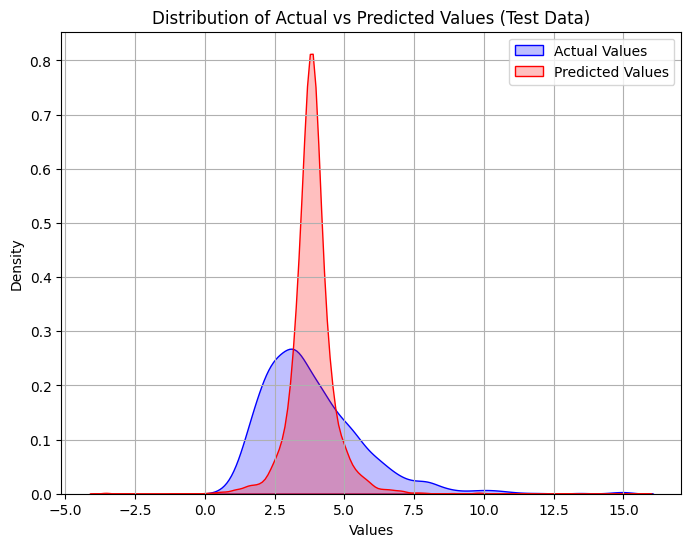

In [37]:
plt.figure(figsize=(8, 6))

sns.kdeplot(y_test1, label="Actual Values", color="blue", fill=True)
sns.kdeplot(y_hat_test, label="Predicted Values", color="red", fill=True)

# Labels and Title
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Distribution of Actual vs Predicted Values (Test Data)")
plt.legend()
plt.grid(True)

plt.show()